IMPORTING LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

EDA

In [3]:
bank=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Logistic%20regression/bank-full.csv',sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank.shape

(45211, 17)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

PREPROCESSING DATA

In [9]:
label_encoder=LabelEncoder()
bank['job']=label_encoder.fit_transform(bank['job'])
bank['marital']=label_encoder.fit_transform(bank['marital'])
bank['education']=label_encoder.fit_transform(bank['education'])
bank['default']=label_encoder.fit_transform(bank['default'])
bank['housing']=label_encoder.fit_transform(bank['housing'])
bank['loan']=label_encoder.fit_transform(bank['loan'])
bank['contact']=label_encoder.fit_transform(bank['contact'])
bank['month']=label_encoder.fit_transform(bank['month'])
bank['poutcome']=label_encoder.fit_transform(bank['poutcome'])
bank['y']=label_encoder.fit_transform(bank['y'])

In [10]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


VISUALISATIONS

<Axes: xlabel='age', ylabel='count'>

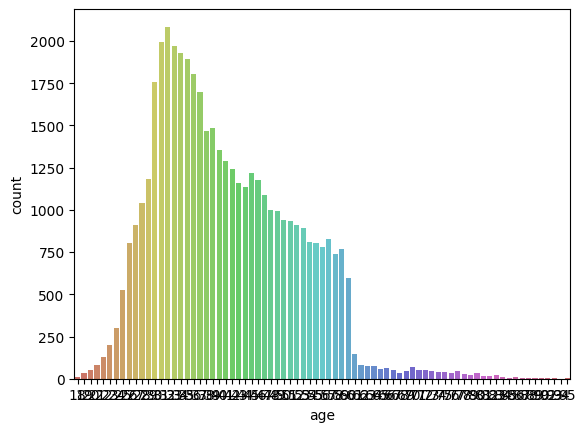

In [11]:
sns.countplot(x="age",data=bank,palette="hls")

<Axes: xlabel='job', ylabel='count'>

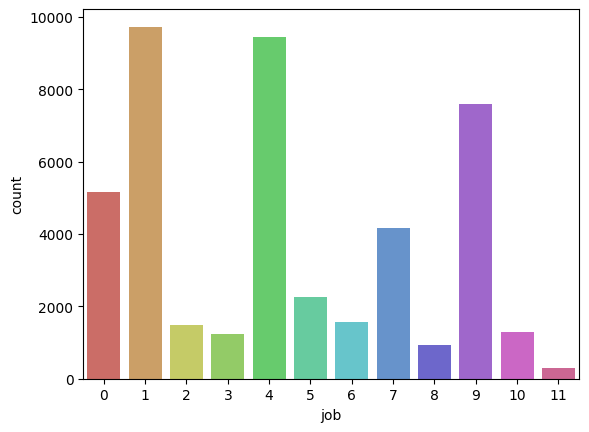

In [12]:
sns.countplot(x="job",data=bank,palette="hls")

In [13]:
pd.crosstab(bank.housing,bank.loan)

loan,0,1
housing,,
0,17204,2877
1,20763,4367


<Axes: xlabel='housing'>

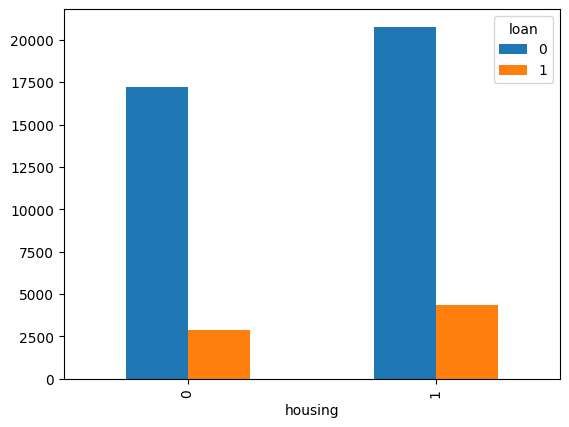

In [14]:
pd.crosstab(bank.housing,bank.loan).plot(kind='bar')

MODEL BUILDING

In [21]:
from sklearn.linear_model import LogisticRegression

In [17]:
x=bank.iloc[:,0:16]
y=bank.iloc[:,16]

In [18]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [19]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [24]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [25]:
classifier.coef_

array([[-3.16927654e-02,  1.45940589e-02, -9.21323098e-02,
        -1.31764472e-02, -4.79434706e-03,  4.00428561e-05,
        -1.81623436e-01, -5.35131143e-02, -1.86772854e-01,
        -8.42355503e-03, -5.99403301e-02,  3.27148816e-03,
        -2.67073009e-01, -1.23720685e-03,  1.20010031e-01,
        -1.80593800e-01]])

In [26]:
classifier.predict_proba (x)

array([[0.94851339, 0.05148661],
       [0.94884452, 0.05115548],
       [0.94693621, 0.05306379],
       ...,
       [0.67167394, 0.32832606],
       [0.94032647, 0.05967353],
       [0.58156337, 0.41843663]])

In [28]:
y_pred=classifier.predict(x)
bank['y_pred']=y_pred
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


In [29]:
y_prob=pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
new_df=pd.concat([bank,y_prob],axis=1)
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0,0.948513,0.051487
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0,0.948845,0.051155
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0,0.946936,0.053064
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0,0.960846,0.039154
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0,0.903319,0.096681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0,0.615181,0.384819
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0,0.920126,0.079874
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0,0.671674,0.328326
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0,0.940326,0.059674


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix

array([[39279,   643],
       [ 4437,   852]])

In [31]:
pd.crosstab(y,y_pred)

col_0,0,1
y,,
0,39279,643
1,4437,852


In [32]:
accuracy=sum(y_pred==y)/bank.shape[0]
accuracy

0.8876379642122493

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     43716
           1       0.16      0.57      0.25      1495

    accuracy                           0.89     45211
   macro avg       0.57      0.73      0.60     45211
weighted avg       0.96      0.89      0.92     45211



In [38]:
from sklearn.metrics import roc_auc_score,roc_curve
Logit_roc_score=roc_auc_score(y,y_pred)
Logit_roc_score

0.5724913226281891

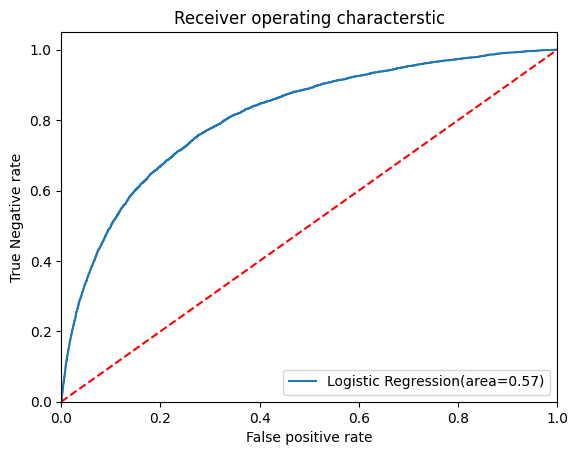

In [41]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)'%Logit_roc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True Negative rate')
plt.title('Receiver operating characterstic')
plt.legend(loc='lower right')

In [44]:
y_prob1=pd.DataFrame(classifier.predict_proba(x)[:,1])
y_prob1

,0
0,0.051487
1,0.051155
2,0.053064
3,0.039154
4,0.096681
...,...
45206,0.384819
45207,0.079874
45208,0.328326
45209,0.059674


In [45]:
import statsmodels.api as sm
logit=sm.Logit(y,x)

In [46]:
logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Wed, 02 Aug 2023   Pseudo R-squ.:                  0.2342
Time:                        09:27:39   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
month          0.0054      0.005      1.013      0.311      -0.005       0.016
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
==============================================================================
"""

In [47]:
fpr

array([0.00000000e+00, 2.50488452e-05, 1.00195381e-04, ...,
       9.97795702e-01, 9.97795702e-01, 1.00000000e+00])

In [48]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [51]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.118795


In [54]:
threshold = 0.118795
preds = np.where(classifier.predict_proba(x)[:,1] > threshold, 1, 0)
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83     39922
           1       0.27      0.75      0.39      5289

    accuracy                           0.73     45211
   macro avg       0.61      0.74      0.61     45211
weighted avg       0.88      0.73      0.78     45211

